# Prueba del KNN con el dataset de MNIST para clasificar numeros escritos a mano 

In [1]:
import KNN
from random import randint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from scipy.io import loadmat



Importamos el dataset de MNIST, donde vienen 70,000 samples
Apartaremos los ultimos 10,000 para que sean nuestro set de testing


In [2]:
mnist = loadmat("./data/mnist-original")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
X_train = mnist_data[:60000]
y_train = mnist_label[:60000]


Imprimiremos una imagen random para ver cómo se ve el dataset, pero tenemos que hacer un reshape antes

Text(0.5, 1.0, 'The label for this image is 3.0')

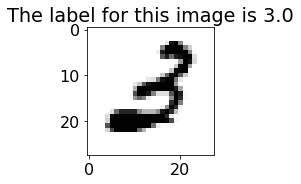

In [3]:
image_index = randint(0, 50000)
mnist_data_image_form = mnist_data.reshape(mnist_data.shape[0],28, 28)
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))
a = plt.subplot(1, 5 + 1, 1)
plt.imshow(mnist_data_image_form[image_index], cmap='Greys')
a.set_title(f'The label for this image is {mnist_label[image_index]}')

Generamos nuestro Knn utilizando la clase del archivo KNN

In [4]:
knn = KNN.K_Nearest_Neighbours(k=5)

In [5]:
knn.train(X_train, y_train)
random_num = randint(60000,70000)
random_test_image = mnist_data[random_num]
random_image_label = mnist_label[random_num]
prediction_results = knn.predict(random_test_image,5)
print(prediction_results)

[{'id': 21886, 'error': 109.09170454255447, 'label': 3.0}, {'id': 5866, 'error': 109.63119993870357, 'label': 0.0}, {'id': 50261, 'error': 109.87720418721983, 'label': 8.0}, {'id': 26452, 'error': 111.00450441310929, 'label': 4.0}, {'id': 29227, 'error': 111.26544836560899, 'label': 4.0}]


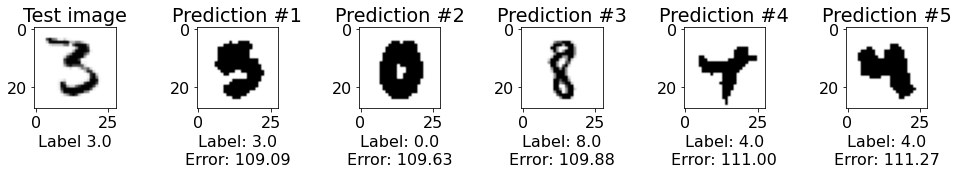

In [6]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))
a = plt.subplot(1, 5 + 1, 1)
plt.imshow(mnist_data_image_form[random_num], cmap='Greys')
a.set_title(f'Test image')
plt.xlabel(f'Label {mnist_label[random_num]}')
for i in range(5):
    prediction = prediction_results[i]
    prediction_id = prediction['id']
    prediction_error = prediction['error']
    prediction_label = prediction['label']
    a = plt.subplot(1, 5 + 1, i+2)
    plt.imshow(mnist_data_image_form[prediction_id], cmap='Greys')
    a.set_title(f'Prediction #{i + 1}')
    plt.xlabel(f'Label: {prediction_label}\nError: {prediction_error:.2f}')
plt.subplots_adjust(wspace=1, hspace=0.8)